In [9]:
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred= (y_pred > 0.5).astype('int32')


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    sensitivity = tp / (tp + fn)
    precision = tp / (tp + fp)
    
    return {
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Precision': precision
    }

def plot_confusion_matrix(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = (pred > 0.5).astype('int32')
    y_true = y_test

    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    color = sns.color_palette("rocket")
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap=color, cbar=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def load_data(data_path):
    data=pd.read_csv(data_path)
    X = data.iloc[: ,:-1].to_numpy()
    Y = data['labels'].to_numpy()

    X = X.reshape(X.shape[0], X.shape[1], 1)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    return x_train, x_test, y_train, y_test


In [11]:
model_lstm_50 = tf.keras.models.load_model('../model/model_50.h5')
model_lstm_100 = tf.keras.models.load_model('../model/model_100.h5')
model_lstm_200 = tf.keras.models.load_model('../model/model_200.h5')

3587/3587 [==============================] - 12s 3ms/step


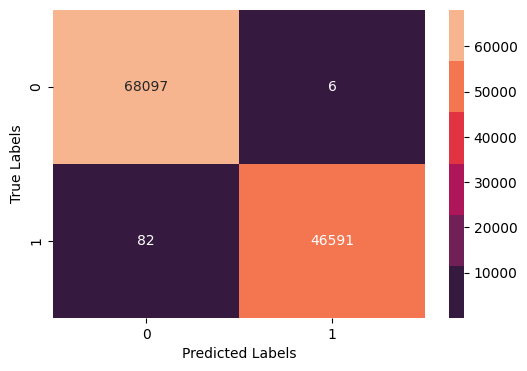

{'TP': 46591, 'FP': 6, 'TN': 68097, 'FN': 82, 'Accuracy': 0.9992332891893776, 'Sensitivity': 0.9982430955798856, 'Precision': 0.9998712363456875}


In [14]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_50.csv")
result_50=evaluate_model(model_lstm_50,x_test,y_test)
plot_confusion_matrix(model_lstm_50,x_test,y_test)
print(result_50)

In [ ]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_100.csv")
result_100=evaluate_model(model_lstm_100,x_test,y_test)
plot_confusion_matrix(model_lstm_100,x_test,y_test)
print(result_100)

In [ ]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_200.csv")
result_200=evaluate_model(model_lstm_200,x_test,y_test)
plot_confusion_matrix(model_lstm_200,x_test,y_test)
print(result_100)